In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [9]:
result = {}
for n in [4, 8, 16, 32, 64, 128, 256, 512, 1024]: # 2048, 4096
    result[n] = {}
    for degree in [2, 3, 4, 5]:
        result[n][degree] = {}
        my_range = np.linspace(0.4 *degree*np.log2(n), 6 * degree*np.log2(n), 50)
        m_list = [int(a) for a in my_range]
        for m in m_list:
            result[n][degree][m] = []
            for try_no in range(20):
                with open(f"results/n={n}_m={m}_d={degree}_{try_no}.json") as f:
                    try:
                        data = json.loads(f.read())
                        result[n][degree][m].append(data)
                    except:
                        print(f"results/n={n}_m={m}_d={degree}_{try_no}.json")
                    

results/n=1024_m=100_d=5_17.json
results/n=1024_m=128_d=5_7.json


2


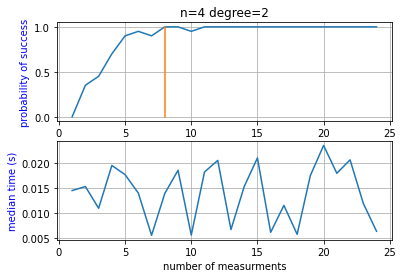

3


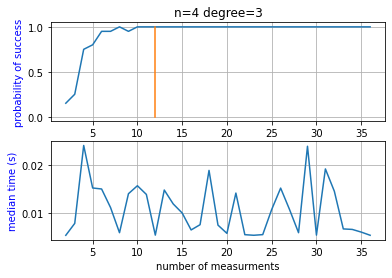

4


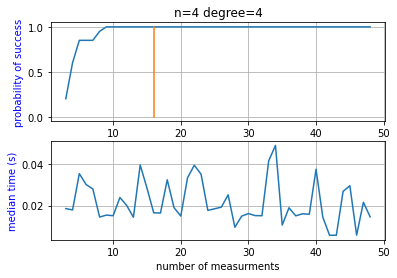

5


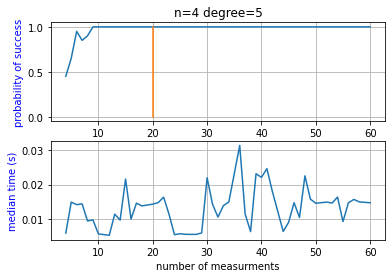

2


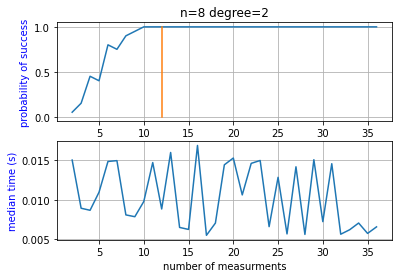

3


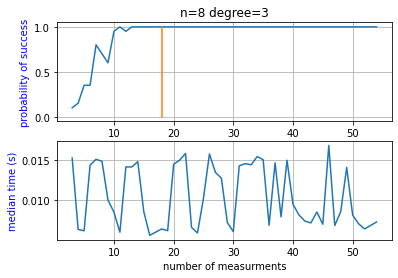

4


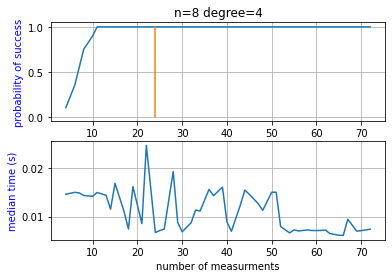

5


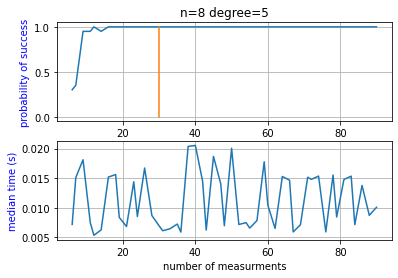

2


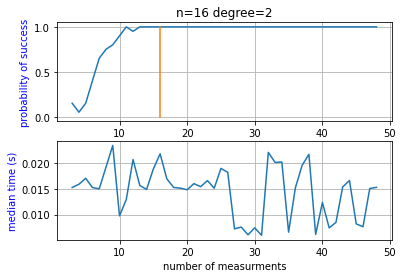

3


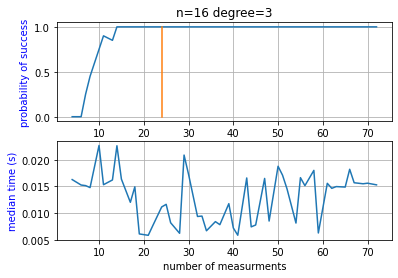

4


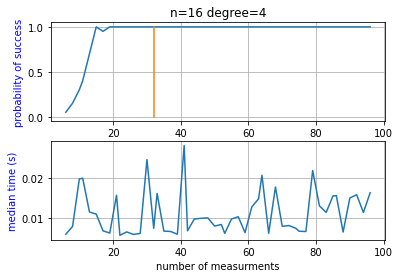

5


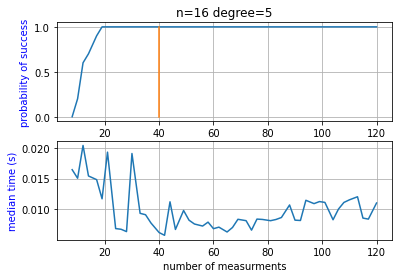

2


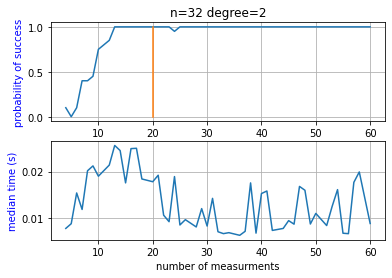

3


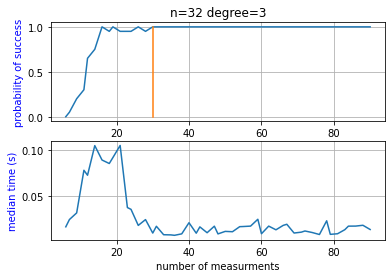

4


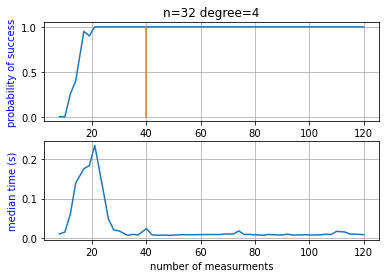

5


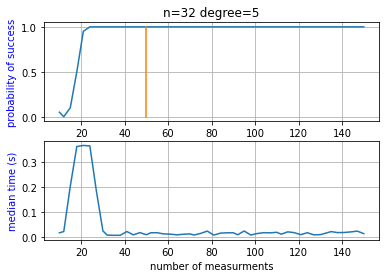

2


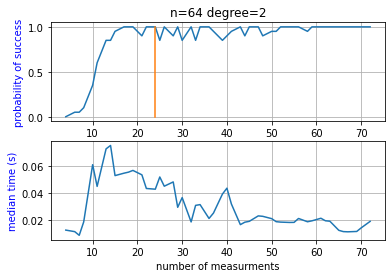

3


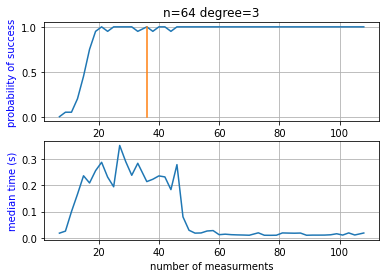

4


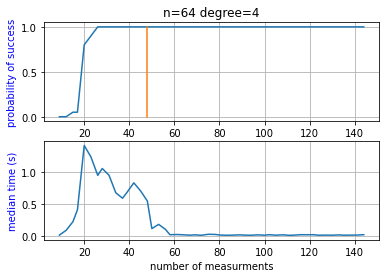

5


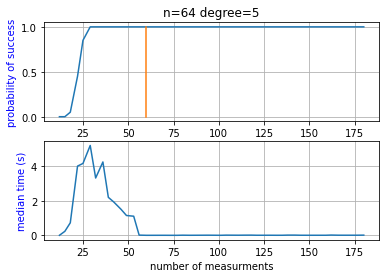

2


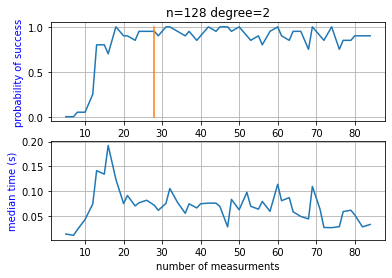

3


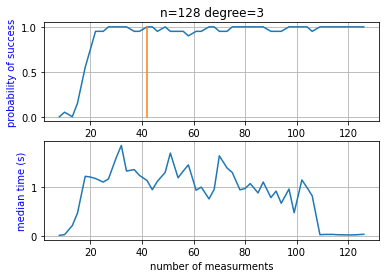

4


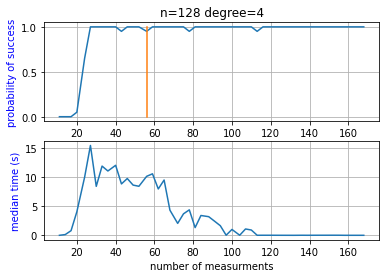

5


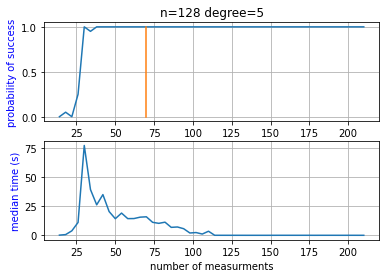

2


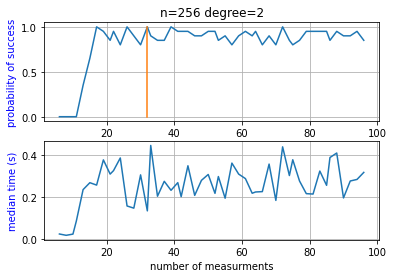

3


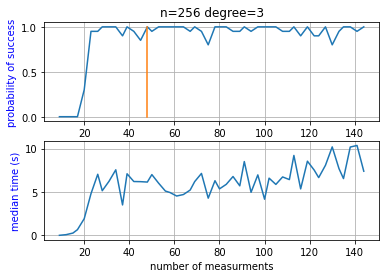

4


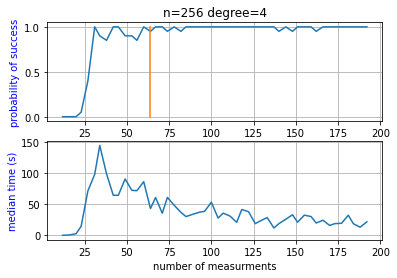

5


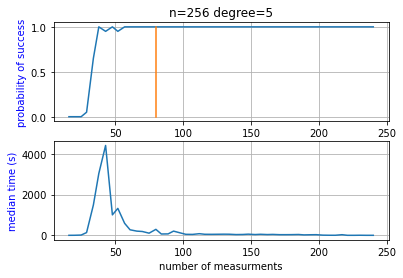

2


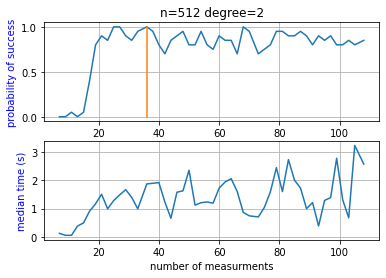

3


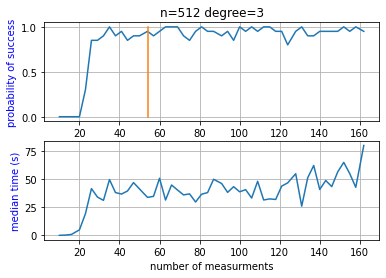

4


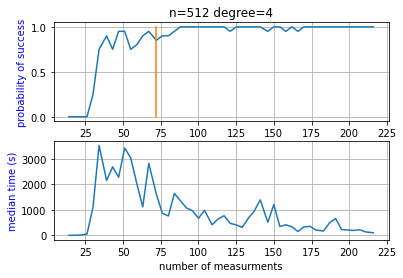

5


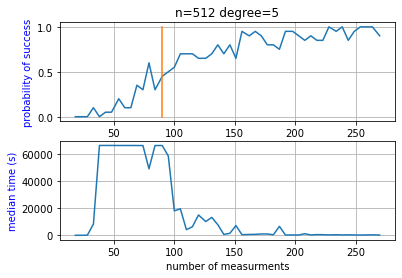

2


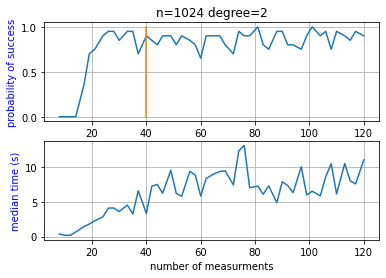

3


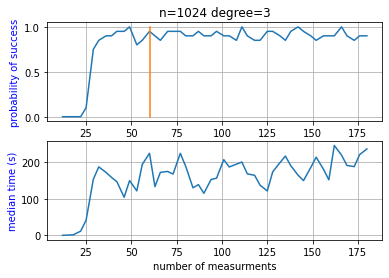

4


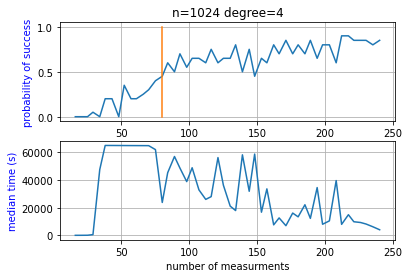

5


IndexError: list index out of range

In [10]:
# failure rates
for n in result:
    for degree in result[n]:
        no_measurements , p_failure, time  = [], [], []
        print(degree)
        for m in result[n][degree]:
            p = sum([1 for j in range(20) if result[n][degree][m][j]["status"]==True])/20
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result[n][degree][m][j]["time"] for j in range(20)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_failure, [2*degree*np.log2(n)]*my_len, np.linspace(0,1,my_len))
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time)
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        
        
        
        plt.show()
           

In [19]:
from math import ceil 
result_binning = {}
for n in [4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    result_binning[n] = {}
    for degree in [2,3,4,5]:
        result_binning[n][degree] = {}
        no_bins_range = np.linspace(0.1 * degree**2,  degree**2, 10)
        no_bins_range = [ceil(a) for a in no_bins_range]
        for no_bins in no_bins_range:
            for no_iterations in [1,2,3,4,5]:
                for ratio in [1.2,1.3,1.4,1.5,1.6]:
                    for try_no in range(10):
                        with open(f"results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json") as f:
                            try:
                                data = json.loads(f.read())
                                m = data["measurements"]
                                try:
                                    result_binning[n][degree][m].append(data)
                                except:
                                    result_binning[n][degree][m] = [data]
                            except:
                                print(f"results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json")
                    
                        
                        

results2/n=32_nobins=15_no_iter=4_ratio=1.4_d=5_1.json
results2/n=32_nobins=23_no_iter=5_ratio=1.4_d=5_8.json
results2/n=64_nobins=2_no_iter=5_ratio=1.5_d=2_5.json
results2/n=64_nobins=2_no_iter=5_ratio=1.5_d=2_5.json
results2/n=64_nobins=2_no_iter=5_ratio=1.5_d=2_5.json
results2/n=64_nobins=3_no_iter=2_ratio=1.6_d=2_1.json
results2/n=64_nobins=3_no_iter=2_ratio=1.6_d=2_5.json
results2/n=64_nobins=3_no_iter=2_ratio=1.6_d=2_1.json
results2/n=64_nobins=3_no_iter=2_ratio=1.6_d=2_5.json
results2/n=64_nobins=3_no_iter=5_ratio=1.6_d=3_7.json
results2/n=64_nobins=12_no_iter=2_ratio=1.2_d=4_5.json
results2/n=64_nobins=12_no_iter=2_ratio=1.4_d=4_7.json
results2/n=64_nobins=15_no_iter=5_ratio=1.3_d=4_1.json
results2/n=64_nobins=23_no_iter=1_ratio=1.2_d=5_2.json
results2/n=64_nobins=23_no_iter=1_ratio=1.3_d=5_6.json
results2/n=128_nobins=4_no_iter=2_ratio=1.6_d=3_5.json
results2/n=128_nobins=7_no_iter=2_ratio=1.5_d=3_9.json
results2/n=128_nobins=9_no_iter=5_ratio=1.3_d=3_9.json
results2/n=128_nob

In [12]:
# failure rates
for n in result:
    for degree in result[n]:
        no_measurements , p_failure, time  = [], [], []
        print(degree)
        for m in result[n][degree]:
            p = sum([1 for j in range(len(result_)) if result_binning[n][degree][m][j]["status"]==True])/20
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result[n][degree][m][j]["time"] for j in range(20)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_failure, [2*degree*np.log2(n)]*my_len, np.linspace(0,1,my_len))
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time)
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        
        
        
        plt.show()
           

ZeroDivisionError: division by zero